Found 126 images belonging to 3 classes.


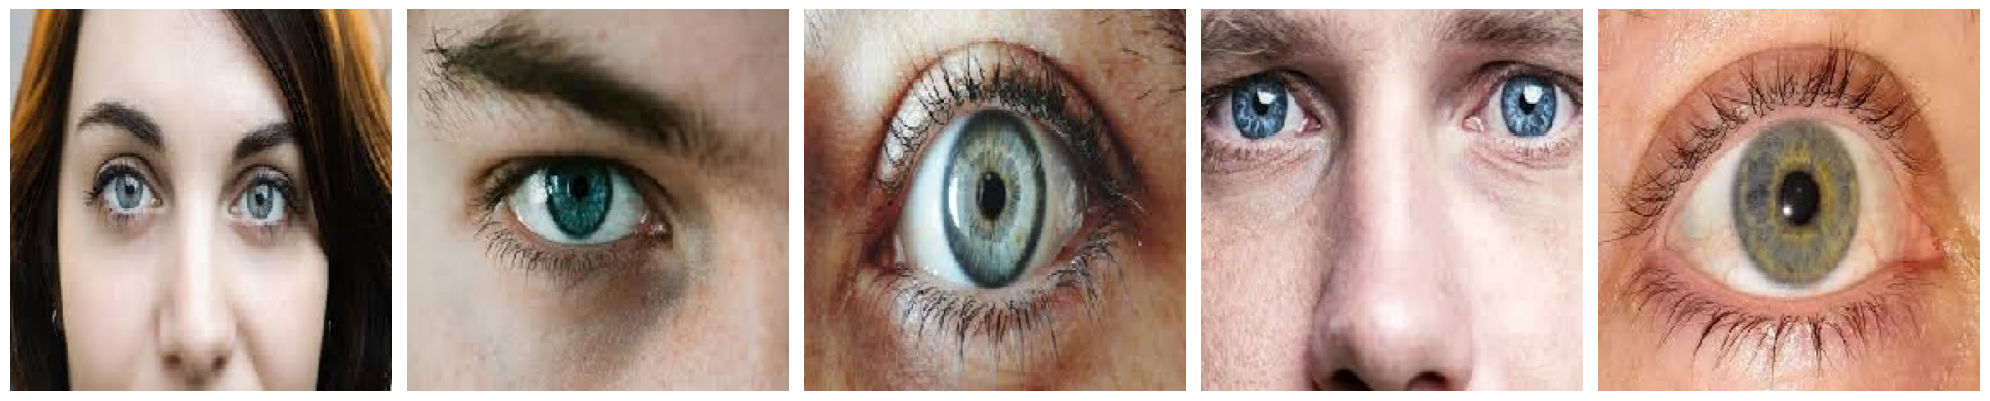

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths
train_dir = r'C:\Users\kaush\Downloads\eyes dataset\train'

# Initialize ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the train dataset
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Function to display sample images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images and labels
images, labels = next(train_data)

# Plot the first 5 images
plot_images(images[:5])


Found 126 images belonging to 3 classes.


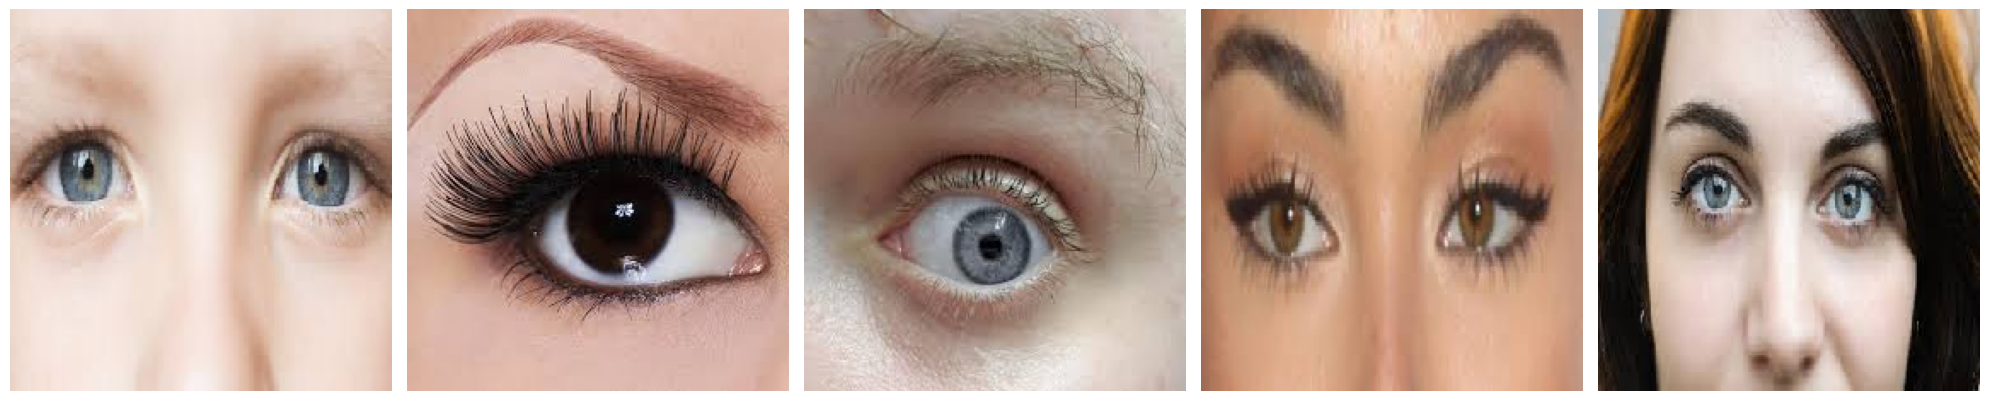

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Define the paths
train_dir = r'C:\Users\kaush\Downloads\eyes dataset\train'

# Initialize ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the train dataset
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Function to display sample images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images and labels
images, labels = next(train_data)

# Plot the first 5 images
plot_images(images[:5])

# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of MobileNetV2 to avoid training them
base_model.trainable = False

# Add custom layers on top for your specific task
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')  # Output layer for your classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally, train the model
# model.fit(train_data, epochs=10)


In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Define the path to your training dataset
train_dir = r'C:\Users\kaush\Downloads\eyes dataset\train'

# Initialize ImageDataGenerator with augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,        # Random rotations
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    shear_range=0.2,          # Random shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest',      # Filling in missing pixels after transformations
    validation_split=0.2      # 20% of data will be used for validation
)

# Load the training dataset with a validation split
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'        # Use the training subset
)

valid_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation'      # Use the validation subset
)

# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of MobileNetV2 to avoid training them
base_model.trainable = False

# Add custom layers on top for your specific task
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')  # Output layer for your classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to verify the structure
model.summary()

# Train the model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=valid_data
)

# Evaluate the model on the validation data (optional)
val_loss, val_accuracy = model.evaluate(valid_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Found 102 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,691 (9.87 MB)

 Trainable params: 328,707 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.2866 - loss: 1.8546

C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2960 - loss: 1.9054 - val_accuracy: 0.4167 - val_loss: 1.6845
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 851ms/step - accuracy: 0.5558 - loss: 1.2169 - val_accuracy: 0.2917 - val_loss: 1.9965
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 857ms/step - accuracy: 0.3012 - loss: 1.5673 - val_accuracy: 0.6250 - val_loss: 1.0393
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 916ms/step - accuracy: 0.5614 - loss: 0.9072 - val_accuracy: 0.4167 - val_loss: 1.4114
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 865ms/step - accuracy: 0.6266 - loss: 0.9796 - val_accuracy: 0.4167 - val_loss: 1.2920
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 826ms/step - accuracy: 0.5827 - loss: 0.9296 - val_accuracy: 0.2917 - val_loss: 1.2521
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 807ms/step - accuracy: 0.6009 - loss: 0.7823 - val_accuracy: 0.5000 - val_loss: 1.2054
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 800ms/step - accuracy: 0.7387 - loss: 0.6546 - val_accuracy: 0.5000 - val_loss: 1.2651
Epoch

Found 592 images belonging to 3 classes.


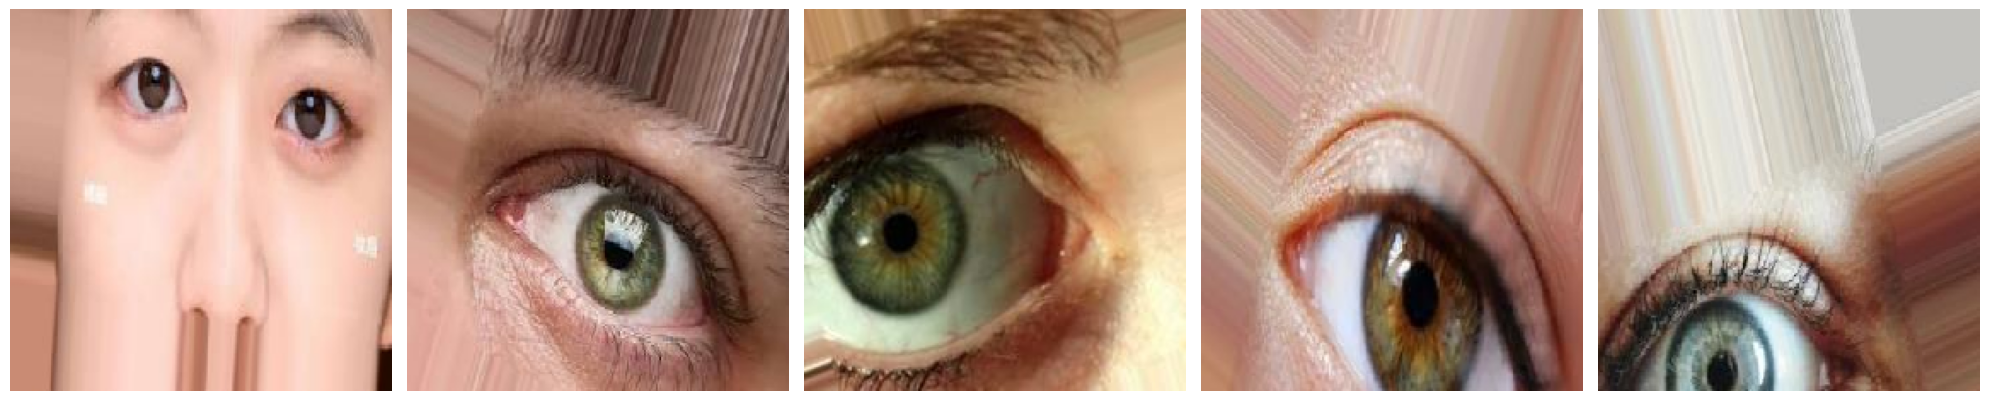

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths
train_dir = r'C:/Users/kaush/Downloads/eyes dataset/augmented.imgs'

# Initialize ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the train dataset
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Function to display sample images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images and labels
images, labels = next(train_data)

# Plot the first 5 images
plot_images(images[:5])


Found 475 images belonging to 3 classes.
Found 117 images belonging to 3 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,691 (9.87 MB)

 Trainable params: 328,707 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 984ms/step - accuracy: 0.4152 - loss: 1.4506 - val_accuracy: 0.6239 - val_loss: 0.8117
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 884ms/step - accuracy: 0.7521 - loss: 0.6183 - val_accuracy: 0.7009 - val_loss: 0.7079
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 924ms/step - accuracy: 0.8687 - loss: 0.4024 - val_accuracy: 0.7009 - val_loss: 0.6477
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 933ms/step - accuracy: 0.9232 - loss: 0.3028 - val_accuracy: 0.8034 - val_loss: 0.4794
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 892ms/step - accuracy: 0.9738 - loss: 0.1943 - val_accuracy: 0.8120 - val_loss: 0.4759
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 884ms/step - accuracy: 0.9928 - loss: 0.1208 - val_accuracy: 0.8462 - val_loss: 0.4148
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9993 - loss: 0.0838 - val_accuracy: 0.8462 - val_loss: 0.3883
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 905ms/step - accuracy: 1.0000 - loss: 0.0697 - val_accurac

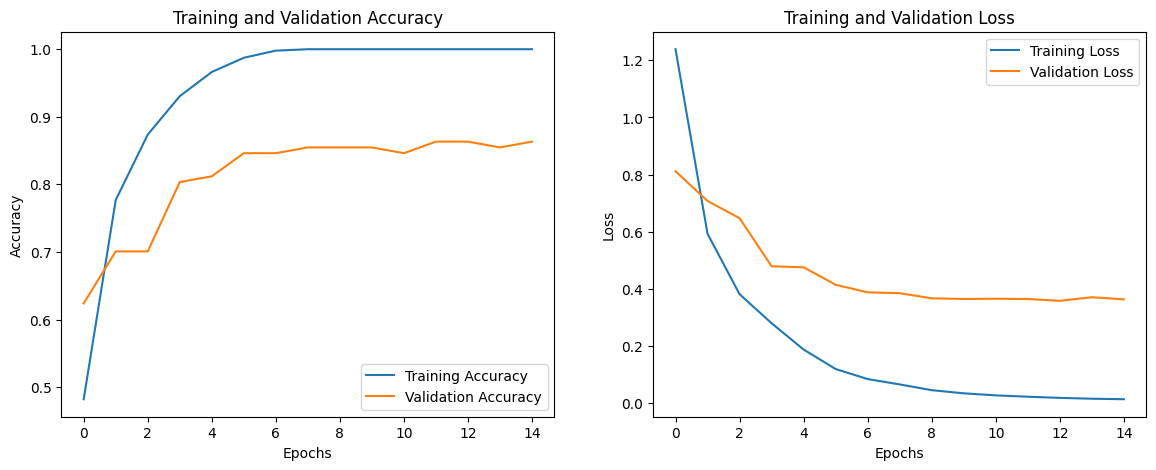

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Define the path to your training dataset
train_dir = r'C:/Users/kaush/Downloads/eyes dataset/augmented.imgs'

# Initialize ImageDataGenerator for rescaling only (no augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    validation_split=0.2     # 20% of data will be used for validation
)

# Load the training dataset with a validation split
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'        # Use the training subset
)

valid_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation'      # Use the validation subset
)

# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of MobileNetV2 to avoid training them
base_model.trainable = False

# Add custom layers on top for your specific task
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')  # Output layer for your classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to verify the structure
model.summary()

# Train the model
history = model.fit(
    train_data,
    epochs=15,
    validation_data=valid_data
)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(valid_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Found 475 images belonging to 3 classes.
Found 117 images belonging to 3 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,691 (9.87 MB)

 Trainable params: 328,707 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 974ms/step - accuracy: 0.4372 - loss: 1.2710 - val_accuracy: 0.6154 - val_loss: 0.7518
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 900ms/step - accuracy: 0.7387 - loss: 0.6028 - val_accuracy: 0.7778 - val_loss: 0.6150
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 897ms/step - accuracy: 0.9048 - loss: 0.3642 - val_accuracy: 0.7607 - val_loss: 0.5192
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 894ms/step - accuracy: 0.9450 - loss: 0.2259 - val_accuracy: 0.8291 - val_loss: 0.4496
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 924ms/step - accuracy: 0.9882 - loss: 0.1422 - val_accuracy: 0.8291 - val_loss: 0.4408
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 950ms/step - accuracy: 0.9912 - loss: 0.1067 - val_accuracy: 0.8034 - val_loss: 0.5101
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 901ms/step - accuracy: 0.9912 - loss: 0.1049 - val_accuracy: 0.8462 - val_loss: 0.3774
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 896ms/step - accuracy: 0.9958 - loss: 0.0722 - val_accuracy: 0.837

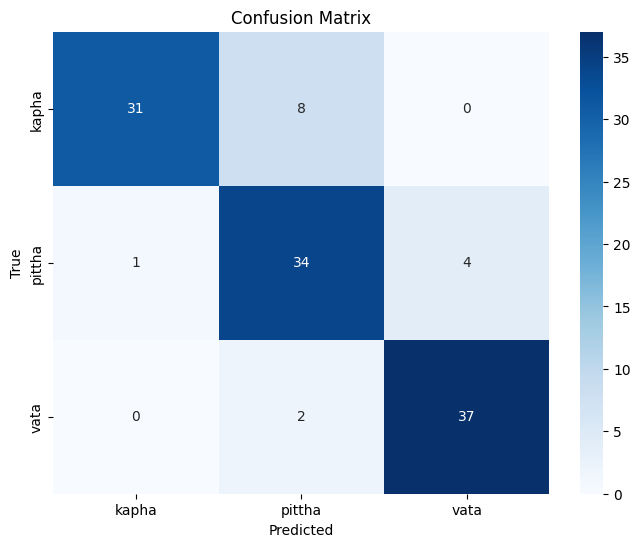

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Define the path to your training dataset
train_dir = r'C:/Users/kaush/Downloads/eyes dataset/augmented.imgs'

# Initialize ImageDataGenerator for rescaling only (no augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    validation_split=0.2     # 20% of data will be used for validation
)

# Load the training dataset with a validation split
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'        # Use the training subset
)

valid_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=False,           # Ensure the order is preserved for predictions
    subset='validation'      # Use the validation subset
)

# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of MobileNetV2 to avoid training them
base_model.trainable = False

# Add custom layers on top for your specific task
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')  # Output layer for your classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to verify the structure
model.summary()

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=valid_data
)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(valid_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions on the validation data
predictions = model.predict(valid_data)
y_pred = np.argmax(predictions, axis=1)
y_true = valid_data.classes  # True labels

# Classification Report
print("Classification Report:")
class_labels = list(valid_data.class_indices.keys())  # Class labels
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# Save the model to a file
model.save("mobilenet_best_model.h5")
